In [17]:
from google.colab import files
uploded = files.upload()

Saving ToyotaCorolla - Sheet1.csv to ToyotaCorolla - Sheet1.csv


In [4]:
import pandas as pd
sheet = pd.read_csv('ToyotaCorolla - Sheet1.csv')
sheet.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
file = sheet[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
file.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


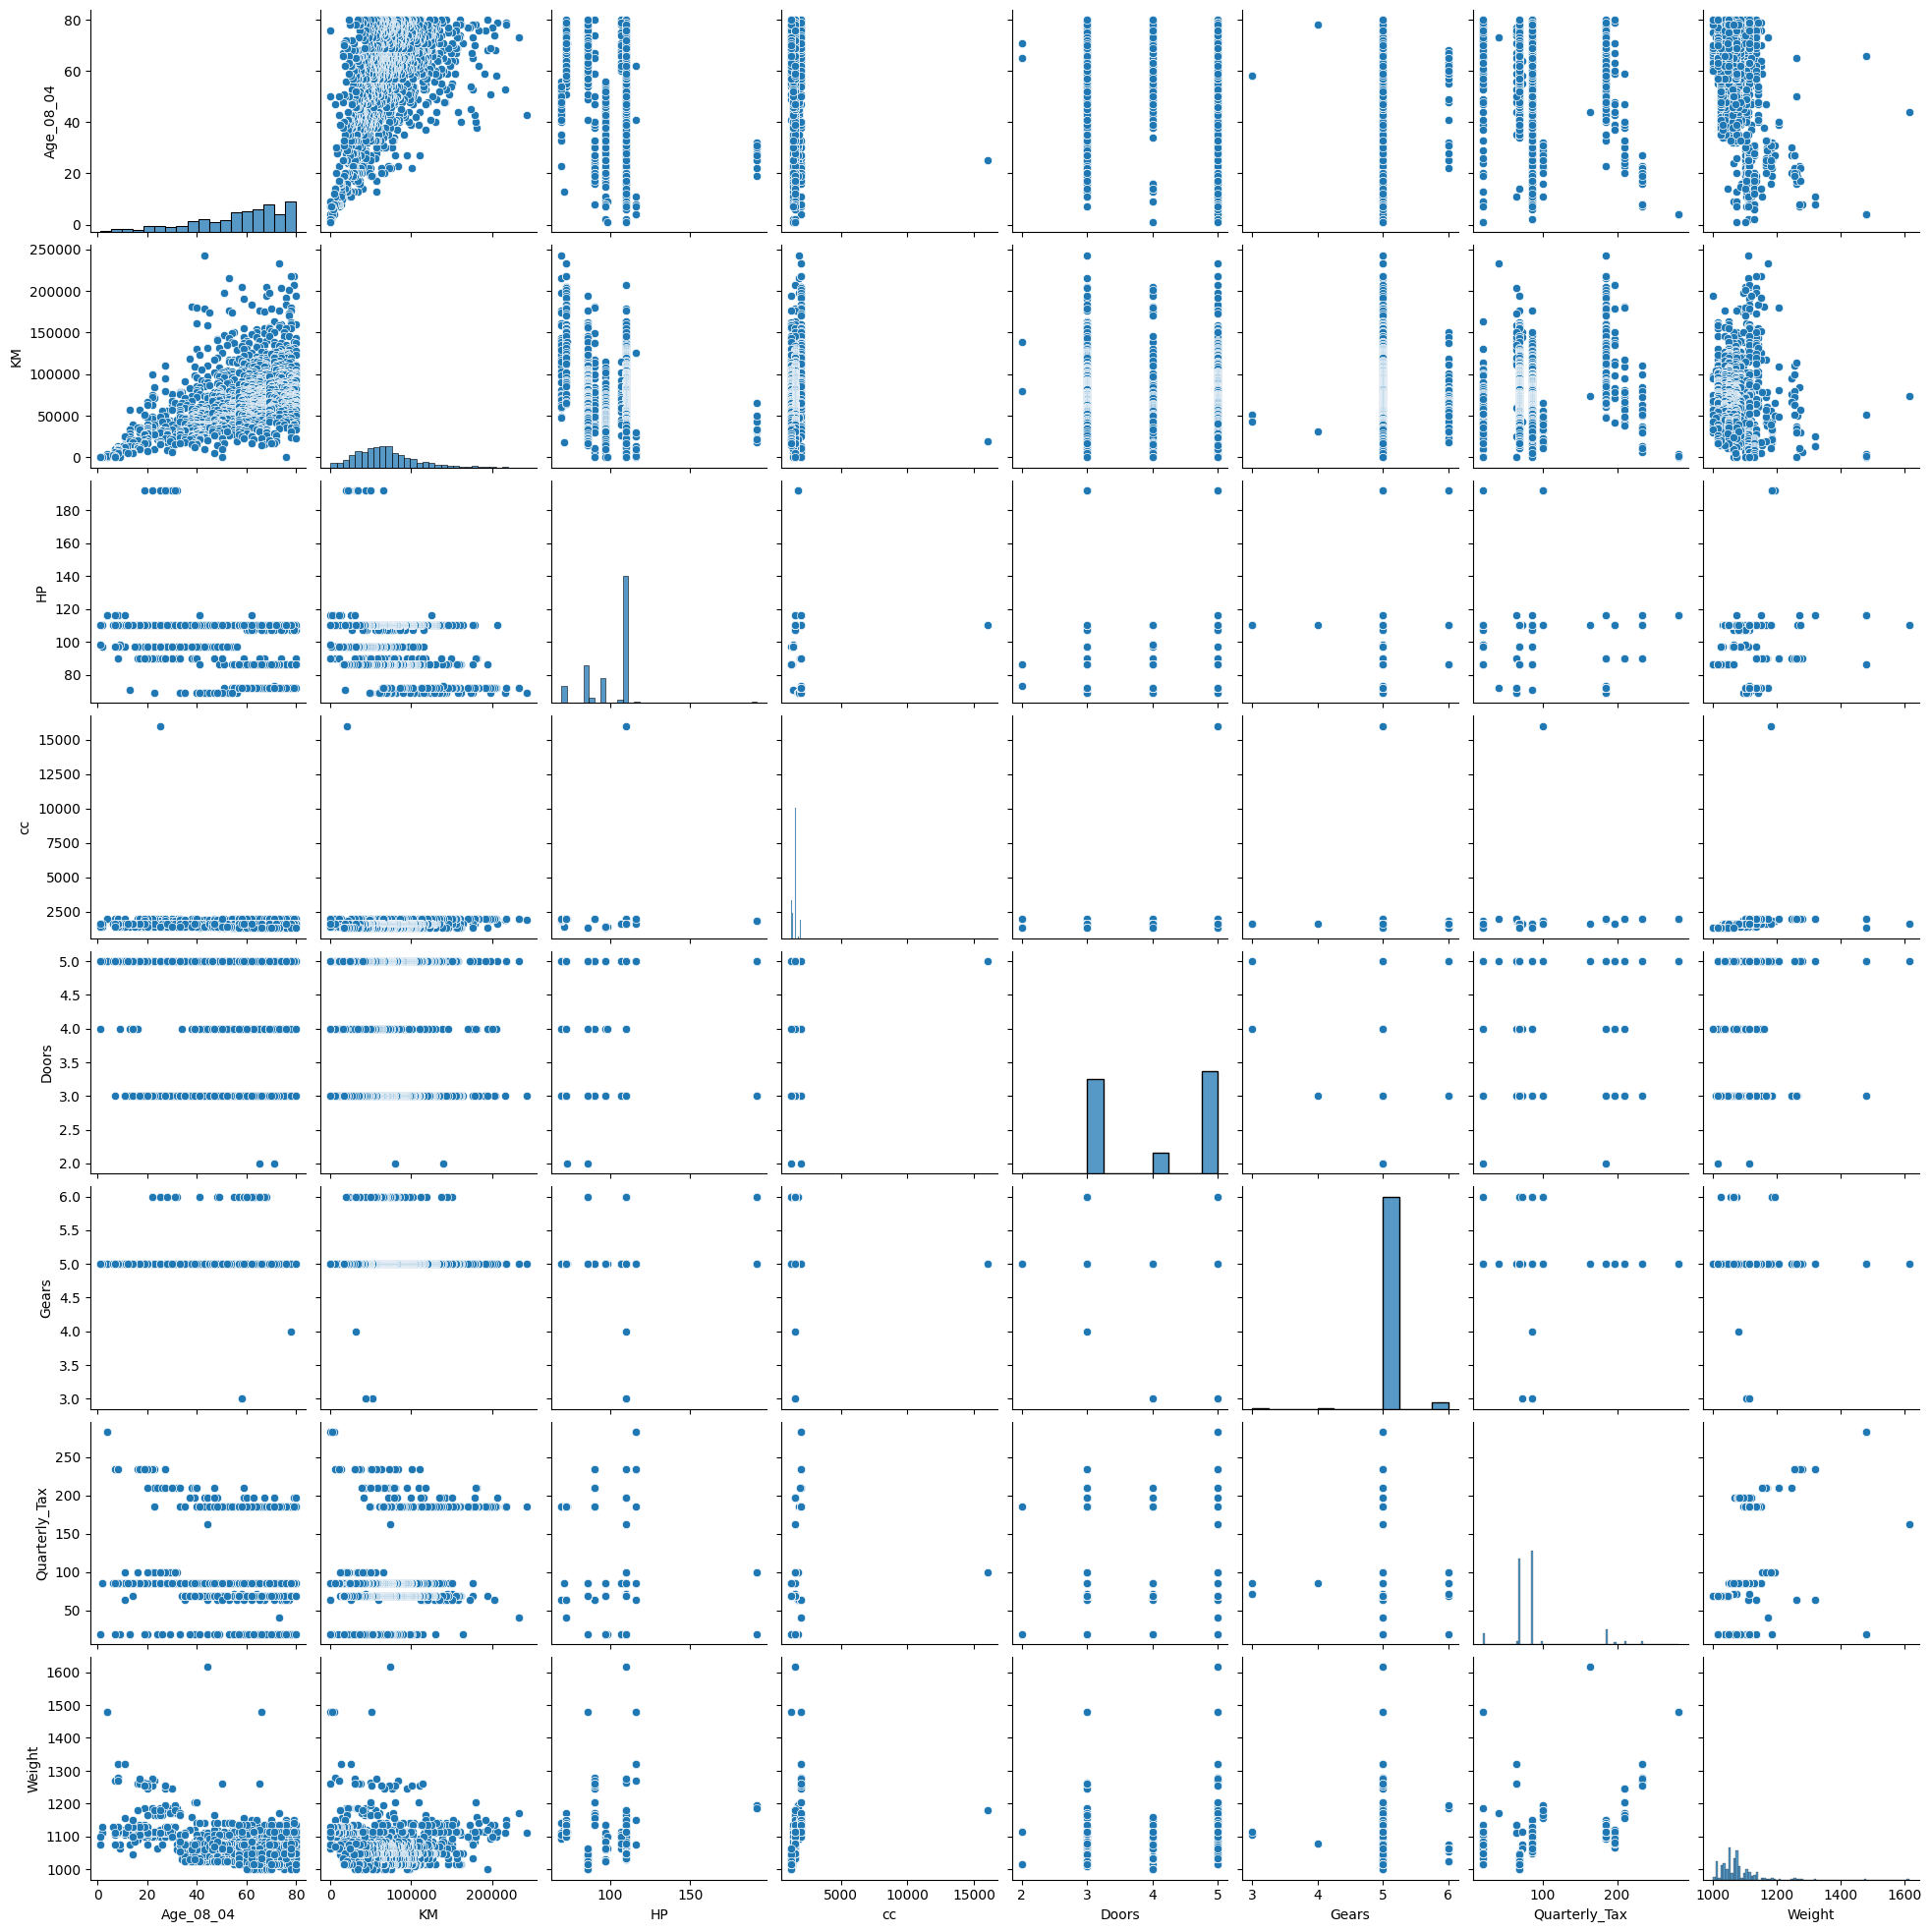

In [7]:
import seaborn  as sns
import matplotlib.pyplot as plt
sns.pairplot(X)
plt.show()

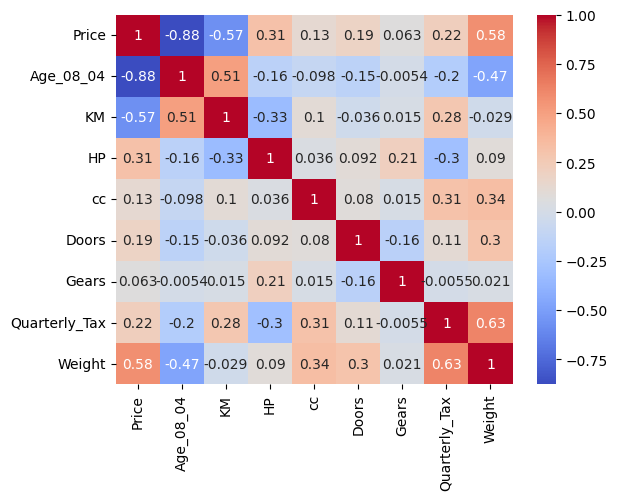

In [8]:
# Calculate correlation matrix
correlation_matrix = file.corr()

# Visualize correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_SS = SS.fit_transform(X)


Dimensions of X_SS: (1436, 8)


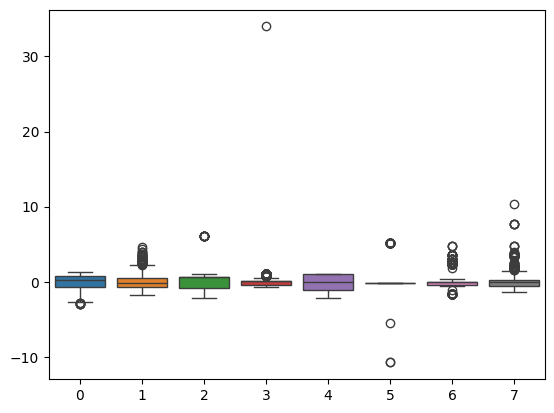

Dimensions of Z_score: (1436, 8)


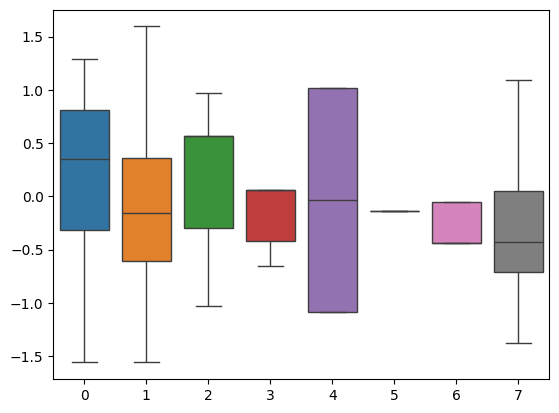

In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming X_SS is your dataset

# Check dimensions of X_SS
print("Dimensions of X_SS:", X_SS.shape)

# Visualize boxplot before removing outliers
sns.boxplot(data=X_SS)
plt.show()

# Calculate Z-scores
Z_score = np.abs(stats.zscore(X_SS))
threshold = 1.6

# Check dimensions of Z_score
print("Dimensions of Z_score:", Z_score.shape)

# Find outlier indices
outlier_indices = np.where(Z_score > threshold)

# Filter outliers from each dimension of X_SS separately
outlier_mask = np.any(Z_score > threshold, axis=1)

# Filter outliers from X_SS
X_no_outliers = X_SS[~outlier_mask]

# Visualize boxplot after removing outliers
sns.boxplot(data=X_no_outliers)
plt.show()


In [93]:
from sklearn.linear_model import Lasso, Ridge

Y_no_outliers = Y[~outlier_mask]

lasso_model = Lasso(alpha=2)
ridge_model = Ridge(alpha=2)


lasso_model.fit(X_no_outliers, Y_no_outliers)
print("Lasso coefficients:", lasso_model.coef_)


ridge_model.fit(X_no_outliers, Y_no_outliers)
print("Ridge coefficients:", ridge_model.coef_)


Lasso coefficients: [-1994.15509097  -498.53924942  -297.49599124     0.
  -116.66736598     0.          -579.6521542   1826.88455168]
Ridge coefficients: [-1.99896217e+03 -5.03962503e+02 -5.05563066e+02  4.70101575e+02
 -1.14180309e+02 -5.30350780e-25 -5.93890299e+02  1.81437633e+03]


In [106]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_no_outliers,Y_no_outliers,test_size = 0.3)
from sklearn.linear_model import LinearRegression
df = LinearRegression()
df.fit(x_train,y_train)
y_pred_train = df.predict(x_train)
y_pred_test = df.predict(x_test)

In [107]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred_train = mean_squared_error(y_train,y_pred_train)
y_pred_test = mean_squared_error(y_test,y_pred_test)
print('root mean squre error for Y pred train',np.sqrt(y_pred_train))
print('root mean squre error for Y pred test',np.sqrt(y_pred_test))

root mean squre error for Y pred train 982.0557627893677
root mean squre error for Y pred test 994.3100469905519


In [108]:
for i in range(100):
  x_train,x_test,y_train,y_test = train_test_split(X_no_outliers,Y_no_outliers,test_size = 0.3,random_state = i)
  df = LinearRegression()
  df.fit(x_train,y_train)
  y_pred_train = df.predict(x_train)
  y_pred_test = df.predict(x_test)
  y_pred_train = mean_squared_error(y_train,y_pred_train)
  y_pred_test = mean_squared_error(y_test,y_pred_test)
print('root mean squre error for Y pred train',np.sqrt(y_pred_train))
print('root mean squre error for Y pred test',np.sqrt(y_pred_test))

root mean squre error for Y pred train 1001.7663181226194
root mean squre error for Y pred test 950.5961045792927
